# IRIS FLOWER CLASSIFICATION

-- The Iris flower dataset consists of three species: setosa, versicolor,
and virginica. These species can be distinguished based on their
measurements. Now, imagine that you have the measurements
of Iris flowers categorized by their respective species. Your
objective is to train a machine learning model that can learn from
these measurements and accurately classify the Iris flowers into
their respective species.

-- Use the Iris dataset to develop a model that can classify iris
flowers into different species based on their sepal and petal
measurements. This dataset is widely used for introductory
classification tasks.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("/content/IRIS.csv")

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.shape

(150, 5)

In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
145,False
146,False
147,False
148,False


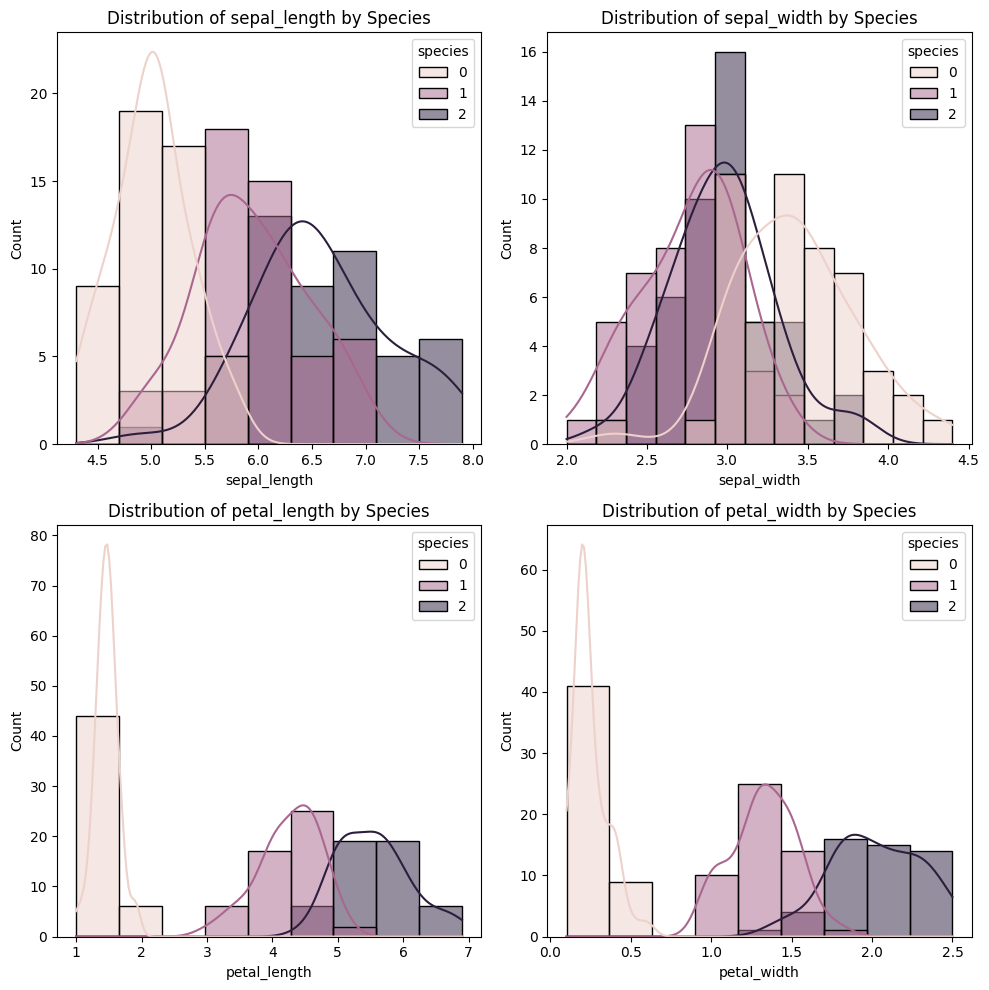

In [ ]:
# Visualize the distribution of each feature
plt.figure(figsize=(10, 10))
for i, col in enumerate(df.columns[:-1]):  # Exclude the 'species' column
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=df, x=col, hue='species', kde=True)
    plt.title(f'Distribution of {col} by Species')
plt.tight_layout()
plt.show()



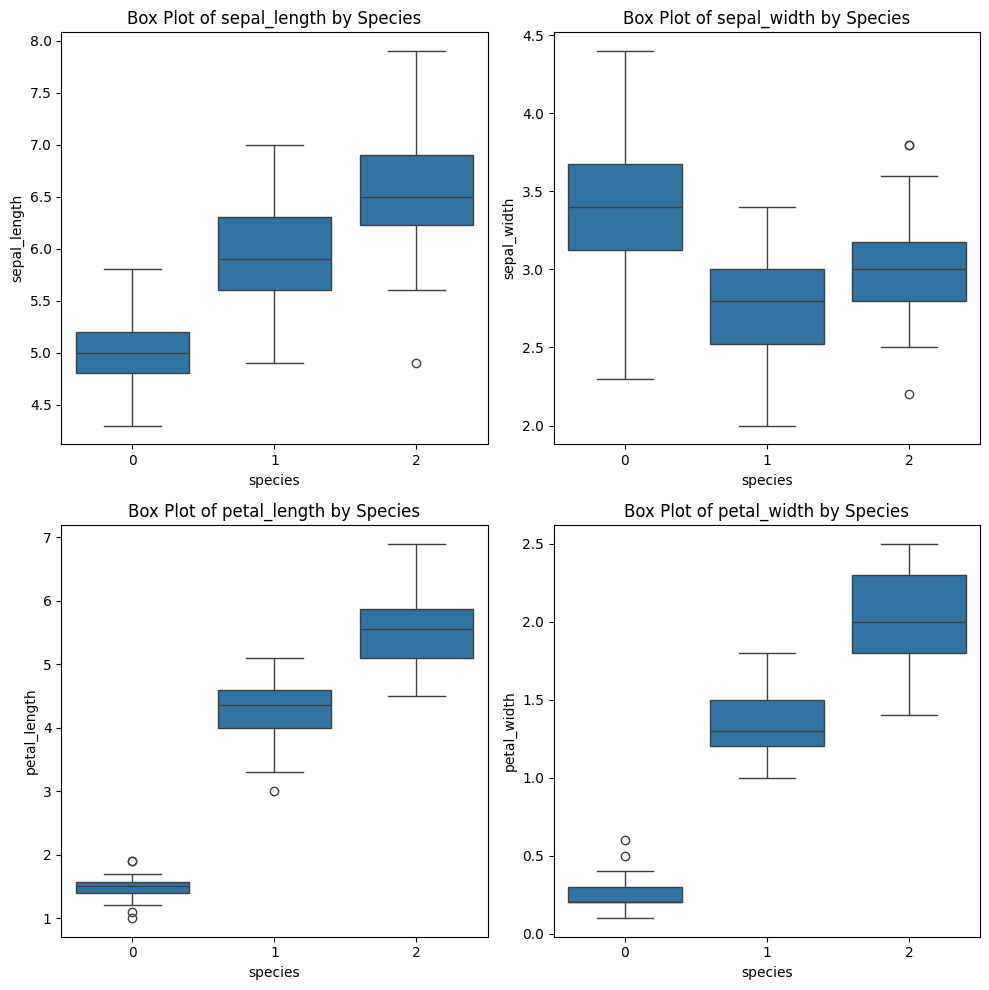

In [ ]:
# Box plot for each feature by species
plt.figure(figsize=(10, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=df, x='species', y=col)
    plt.title(f'Box Plot of {col} by Species')
plt.tight_layout()
plt.show()

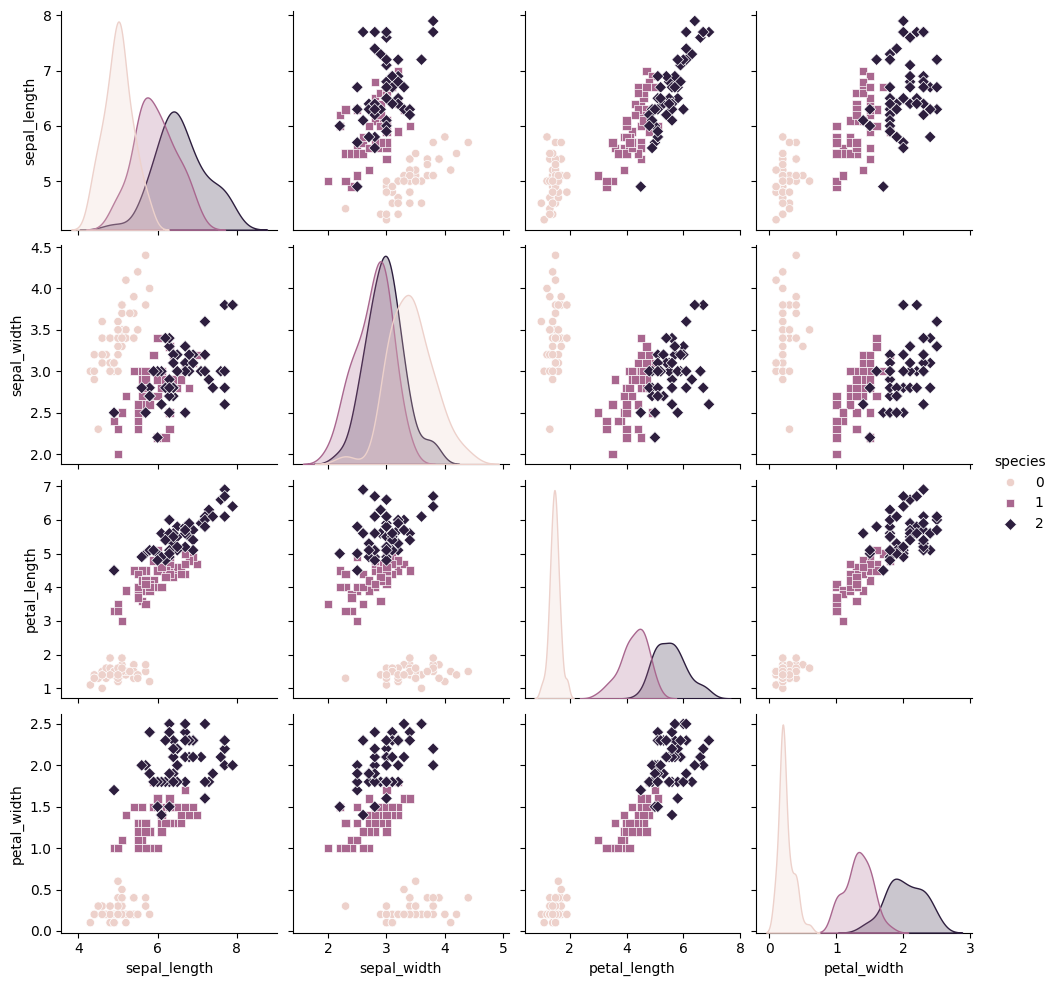

In [ ]:
# Pair plot to visualize relationships between features
sns.pairplot(df, hue='species', markers=["o", "s", "D"])
plt.show()

In [ ]:
# Interactive 3D scatter plot
fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width',
                    color='species', symbol='species', size='petal_length',
                    size_max=18, opacity=0.7)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

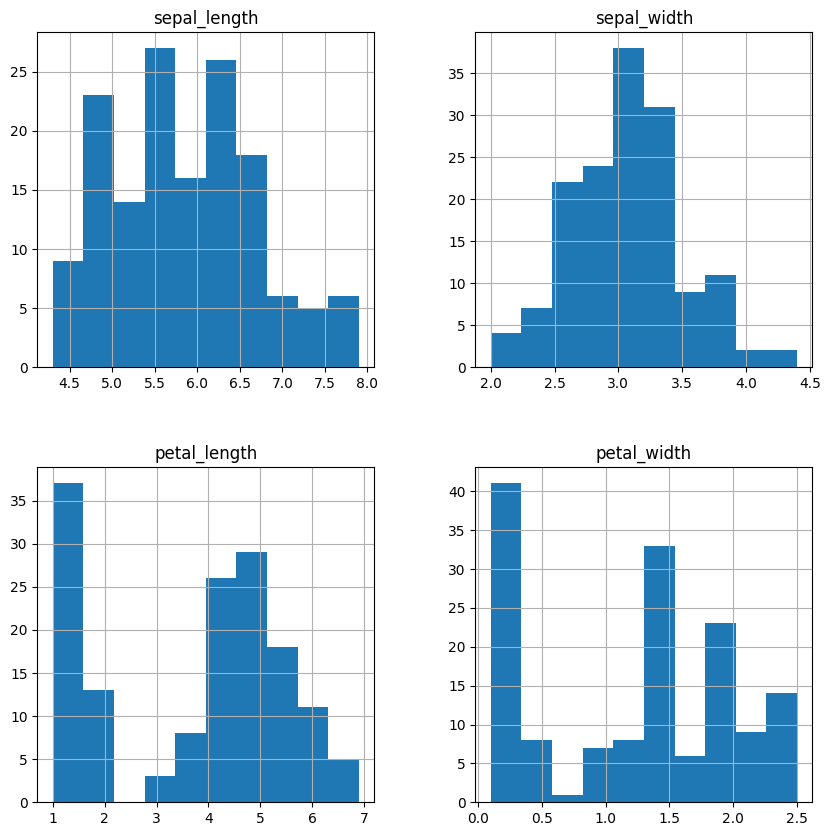

In [ ]:
#Generate histograms for all numeric columns in a DataFrame df
df.hist(figsize=(10,10))
plt.show()

In [ ]:
# Calculate the correlation matrix using only numeric columns.
df.select_dtypes(include=['number']).corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


#COORELATION MATRIX

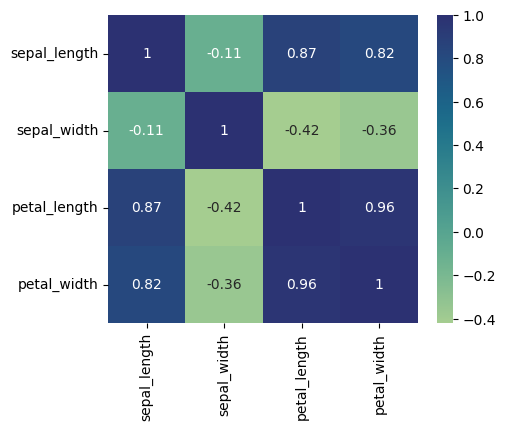

In [ ]:
# Calculate the correlation matrix, excluding non-numeric columns.
corr = df.select_dtypes(include=['number']).corr()
# Create the heatmap using the correlation matrix.
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(corr, annot=True, ax=ax, cmap='crest')
plt.show()

# LABEL ENCODING

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['species']=le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
df['species'].unique()

array([0, 1, 2])

Model Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X = df.drop(columns=['species'])
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test,lr_pred)
lr_acc

In [ ]:
# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)
knn_acc

In [ ]:
# SVM
svm = SVC()
svm.fit(X_train,y_train)
svm_pred = svm.predict(X_test)
svm_acc = accuracy_score(y_test,svm_pred)
svm_acc

In [ ]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test,dt_pred)
dt_acc


In [ ]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test,rf_pred)
rf_acc

1.0

In [ ]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_acc = accuracy_score(y_test, nb_pred)
nb_acc

0.9777777777777777

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree', 'Random Forest', 'Naive Bayes'],
    'Accuracy': [lr_acc, knn_acc, svm_acc, dt_acc, rf_acc, nb_acc]
})

models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,Logistic Regression,1.000000
1,KNN,1.000000
2,SVM,1.000000
3,Decision Tree,1.000000
4,Random Forest,1.000000
5,Naive Bayes,0.977778


In [ ]:
# Accessing the accuracy from the models DataFrame
print('Accuracy',models[models['Model'] == 'Logistic Regression']['Accuracy'].values[0]*100)
#or if you want to print all
for index, row in models.iterrows():
  print(f"Accuracy of {row['Model']}: {row['Accuracy'] * 100}")

Accuracy 100.0
Accuracy of Logistic Regression: 100.0
Accuracy of KNN: 100.0
Accuracy of SVM: 100.0
Accuracy of Decision Tree: 100.0
Accuracy of Random Forest: 100.0
Accuracy of Naive Bayes: 97.77777777777777


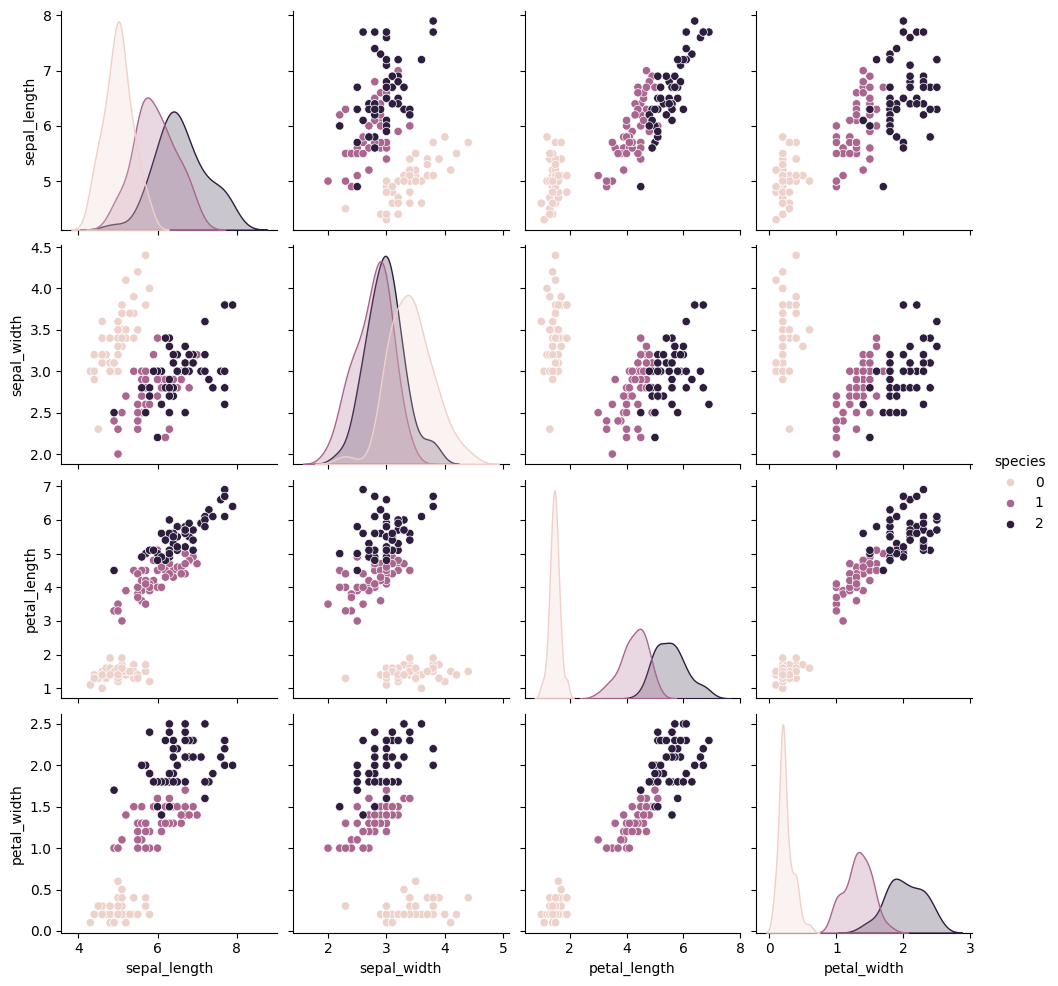

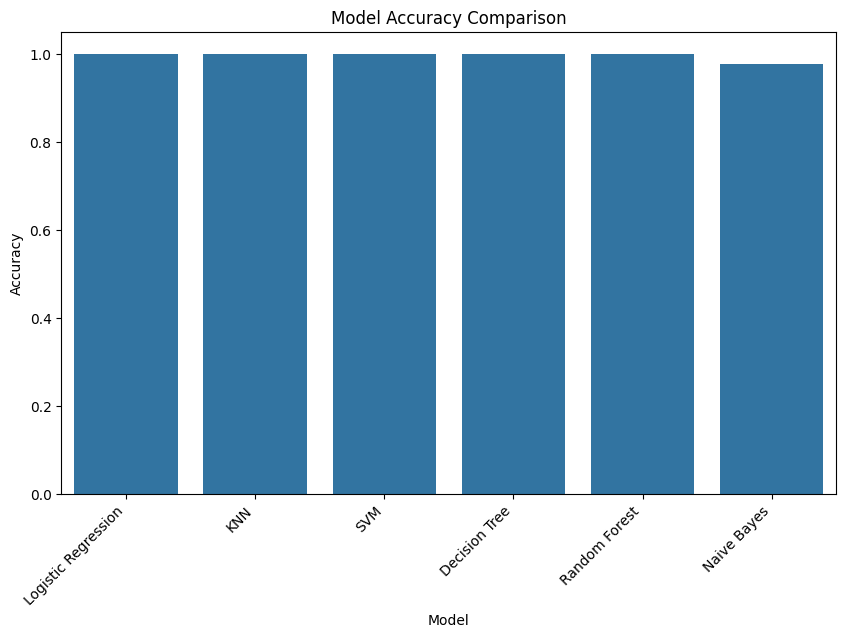

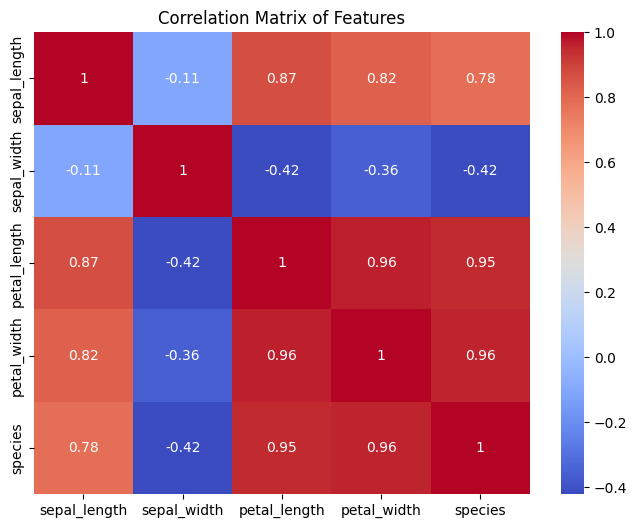

In [ ]:
# 1. Pairplot to visualize relationships between features
sns.pairplot(df, hue='species')
plt.show()

# 2. Bar plot for model comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=models)
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.ylabel('Accuracy')
plt.show()

# 3.  Heatmap (already present in the provided code, but included here for completeness)
corr = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()